In [90]:
import numpy as np
import pandas as pd
import scipy.integrate as int
import scipy.optimize as op
import emcee
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy.constants as const
import sys
from astropy.cosmology import wCDM
#from scipy.interpolate import griddata
from astropy.cosmology import FlatLambdaCDM

In [91]:
#inputting data
cc_xdata, cc_ydata, cc_yerr = np.loadtxt('/Users/eoin/Documents/Python/Data/cc.txt',usecols=(0,1,2), unpack=True)
bao_xdata, bao_ydata, bao_yerr = np.loadtxt('/Users/eoin/Documents/Projects/Cosmology/HighZ/bao.dat',usecols=(0,1,2), unpack=True)

In [92]:
#input_xdata = np.append(cc_xdata, bao_xdata)
#input_ydata = np.append(cc_ydata, bao_ydata)
#input_yerr = np.append(cc_yerr, bao_yerr)
input_xdata = cc_xdata
input_ydata = cc_ydata
input_yerr = cc_yerr

In [110]:
input_xdata.max()
zmin  = 0.7; zmax = 2;

In [111]:
x = np.logical_and(zmin < input_xdata, input_xdata <= zmax)
xdata = input_xdata[x]
ydata = input_ydata[x]
yerr = input_yerr[x]
cov = np.diag(yerr**2)
len(yerr)

14

In [112]:
def H(z, h0, om):
    return h0*np.sqrt(1-om + om*(1+z)**3)

def Hexp(z, A, n):
    return A*(1+z)**(3/2+n) 

In [113]:
popt, pcov = op.curve_fit(Hexp, xdata, ydata, sigma=cov, absolute_sigma=False)
print(popt, np.sqrt(np.diag(pcov)))

[60.48827386 -0.42019166] [10.64701406  0.22147592]


In [114]:
mock_input = np.loadtxt("CC_mock_input_MCMCchain.txt")
iter = 3000

In [115]:
output = []
for i in np.arange(0, iter, 1):
    H0, OM = mock_input[i]
    print(i, H0, OM)
    mock_ydata = np.random.multivariate_normal(H(xdata, H0, OM), cov)
    popt, pcov = op.curve_fit(Hexp, xdata, mock_ydata, sigma=cov, absolute_sigma=False)
    output.append(popt)

output = np.array(output)

0 66.84475786777188 0.3720419462157245
1 67.73418610799106 0.36375545894181593
2 64.23330953878343 0.42577598444381914
3 70.11993407171126 0.28820882858028607
4 68.0245451264397 0.29263806430110245
5 65.36056457447019 0.3405552542935316
6 68.76135000663368 0.30259528263549734
7 68.90572284342966 0.3015494903206511
8 68.87263541257371 0.317367659670837
9 67.26192451951589 0.3555698958746404
10 68.02594761655041 0.288656959752407
11 64.38653991179146 0.38470060112816495
12 65.54912793486449 0.4246000849946802
13 69.28255438003157 0.3162029756832416
14 69.86792528182953 0.25125457269868867
15 73.94395965228418 0.2555878477585076
16 69.8268642121173 0.27691708001833143
17 70.66740700026655 0.32008612471717784
18 65.07788689957292 0.3406416451117678
19 70.02929069101545 0.26766507864259337
20 66.93945503367355 0.379309437016965
21 65.27618296990056 0.3391830986247133
22 62.83231094444321 0.46440120064176593
23 61.90786765710031 0.43796615336423833
24 69.18145161443022 0.3302988544806963
25 

258 69.31976936168556 0.25243943514663214
259 65.44965126954875 0.3574298936652348
260 68.69582564541177 0.3019162493577074
261 69.36845291801956 0.31271734352398417
262 66.91619519359584 0.3259944990562548
263 66.13336967878946 0.32780333573144355
264 70.6769505038274 0.2439821897510228
265 66.67207356356906 0.32627842115576106
266 67.23436249167825 0.3278221567097474
267 63.49478347823302 0.43383496884019834
268 66.26513431393975 0.37469828331493354
269 63.95897513750661 0.38824505914217566
270 63.10145359885628 0.45115489638493994
271 69.14736091466905 0.28712965709504407
272 65.39012148080957 0.33334585489992635
273 66.4077771064791 0.35457178377423343
274 67.24908363364023 0.27645215953591895
275 63.305291414545636 0.39323666199860585
276 64.49120882144776 0.44047879429126835
277 69.52613773322992 0.32703342940095576
278 66.56706641577898 0.3869843929448838
279 70.53414554727811 0.30888585367391364
280 64.33667237650306 0.4126434406405103
281 73.07212465236165 0.230306299315119
28

514 65.04001066641543 0.3617263786929615
515 64.39244554794377 0.3918140545617762
516 73.62673841870973 0.26246030262417386
517 67.76440242807384 0.3503312629742002
518 67.35945296918375 0.3433618283141108
519 64.95834061199817 0.34509746813075254
520 71.37408022462326 0.2509365023245286
521 68.43302117320994 0.37006784860684844
522 70.17964605948231 0.3177693870795845
523 68.89165429359294 0.3140675949834117
524 66.99907636594996 0.3603375607573413
525 66.68705744856624 0.3833853803755485
526 69.52699324047485 0.3246671114411252
527 66.97850223031215 0.332222931805479
528 70.40383857013173 0.30473465195988936
529 67.83595048700995 0.3504974164341777
530 70.61682698323955 0.3259242740795333
531 65.994896990781 0.36868277633576907
532 67.75822977792825 0.3574587705009384
533 68.16824332941424 0.3242845788886401
534 65.38168967612796 0.4027561317627166
535 69.96151296920117 0.29761150481099463
536 64.7936787427215 0.38319327908591305
537 68.31230628403034 0.3105284336477412
538 66.802598

771 65.4789412187649 0.37125320385618554
772 67.74069777253499 0.3189749531220284
773 71.65406594905085 0.28537362550071715
774 73.0992920627326 0.20282307107106115
775 65.3274707889674 0.34885185751951403
776 67.3827192385113 0.3644524169913272
777 68.75953085063948 0.32934012270635576
778 65.6651828181709 0.3659771539735227
779 68.44118903671414 0.32834544056546894
780 67.27417449135336 0.29260202273359304
781 67.20727764145737 0.37063400518096506
782 66.90287783908994 0.3429896361824135
783 64.01534659734045 0.43289366041228755
784 68.51251473292021 0.3256474713595728
785 63.80812416307831 0.37912862132414893
786 62.367501031798824 0.4553539885129255
787 66.2411870805259 0.33099489409805705
788 66.3495682772623 0.3462192757926624
789 70.42248687855647 0.3169836385058644
790 71.20529588922882 0.2807606454971253
791 65.02626274140363 0.3616658409340085
792 69.70681519042877 0.2407280069419408
793 73.49206933329198 0.23668455783505696
794 69.26299096781341 0.34487415526235854
795 65.51

1015 65.30520244126419 0.38469105141611126
1016 67.66241638509122 0.2939940472919204
1017 67.67690039667153 0.31002427725928455
1018 64.07857993167363 0.36703822151683485
1019 65.02247144794829 0.35445669584921075
1020 64.91341214146343 0.3451724275159824
1021 68.14878513219222 0.2880171697270202
1022 70.63847193146613 0.2603126227646238
1023 67.35195207865875 0.311753269496589
1024 69.15983968875722 0.29108719885351314
1025 64.41971667151721 0.4257695857546965
1026 67.38948441396973 0.3231426267283941
1027 70.92633875976523 0.2822468811403145
1028 68.18291906727539 0.31031599966733314
1029 66.3595551664557 0.36247388457286445
1030 68.18637122095194 0.3082674771698613
1031 70.08750245168166 0.29555292830423935
1032 66.46538573864646 0.3133253528019704
1033 68.50340560170109 0.32916198464720986
1034 67.87084140288619 0.3364288611698938
1035 62.572178668938164 0.47724928023746904
1036 67.79946568538391 0.38787827913429035
1037 70.89685592828783 0.3176279580830475
1038 62.000594969398556 

1266 62.57197020443258 0.38268190572766975
1267 70.97808721402367 0.2823929021174731
1268 67.99773190347273 0.3009292455910816
1269 68.43204164433361 0.3815700599564841
1270 64.62395500104785 0.3684043846315284
1271 66.2981162986282 0.26666922508607294
1272 65.50576554453784 0.29808228182606444
1273 64.59682117397479 0.34910160433491244
1274 66.64337705408303 0.3264666879824579
1275 68.65696346700442 0.33320618554572934
1276 69.19600552392666 0.28559739399653855
1277 65.6112895986584 0.3225280440951991
1278 59.13086748203682 0.5402634970311249
1279 70.82891846574647 0.21678566044764838
1280 63.20010495355654 0.39579254512934503
1281 65.56491287822244 0.4124489112272993
1282 72.95513264494365 0.23589564318845002
1283 63.08793664155198 0.3978328642709953
1284 66.80226705954468 0.3031339084721476
1285 67.47129726068384 0.36260148524881103
1286 68.12028886492644 0.3238213582902172
1287 63.139640362555745 0.43141131087797613
1288 67.46514294372942 0.3055853273717445
1289 69.8295915442182 0.

1512 66.99285135684583 0.29256762658158136
1513 65.02403057529295 0.30503186185020026
1514 60.997090380890434 0.42526714270258614
1515 63.86525343875002 0.32577998046194345
1516 65.84026298901252 0.34809490599379217
1517 67.69869044136776 0.30960673639242353
1518 65.23485069575392 0.3937444651158907
1519 68.79241628672625 0.31184167394230655
1520 63.4424520113448 0.3936151407332128
1521 66.37088371660667 0.361845074304267
1522 69.79516743098273 0.32786672618232315
1523 68.71223379953398 0.2732804495737147
1524 71.85142674507433 0.2401104429254488
1525 68.13783303827404 0.3665494949151899
1526 68.7078067869694 0.2871056557279948
1527 65.21257470193369 0.35240032395598186
1528 65.97028002293273 0.3389416101250722
1529 64.46753562408271 0.4085716625743005
1530 70.40768167425566 0.3492115959770597
1531 66.56578286683204 0.3898196474056293
1532 64.031957043669 0.4005394174622266
1533 60.907573800477735 0.4772597068979433
1534 66.04708951887443 0.37673948624513176
1535 66.76339196656774 0.29

1757 69.60590838346322 0.34232614202964323
1758 69.07483505540723 0.34206719291979887
1759 69.09513901268218 0.3777322901072058
1760 61.431386978893066 0.4084647123737718
1761 68.57018405989547 0.29719892956876787
1762 65.5595830731659 0.33548482038218097
1763 68.05243147154111 0.3353167555370495
1764 65.41246540554638 0.3205525510569404
1765 69.38293152088453 0.3234950085202418
1766 67.03151404508654 0.33439910479741214
1767 73.46768913559065 0.25010972608425414
1768 68.62737095470594 0.32213728648244333
1769 67.42014933791427 0.3780278048859999
1770 69.10581806973192 0.35636313279618065
1771 67.97166169151042 0.30513422391875245
1772 63.55293355648619 0.3910516581908651
1773 70.9906792013508 0.3052756612593465
1774 67.7009435086447 0.3411800241225821
1775 66.62493936604072 0.31362526177199906
1776 69.76233229742427 0.23228805795424926
1777 69.7127711921497 0.3289089387944652
1778 67.52761599958143 0.34031350325377757
1779 67.04331865920727 0.3282353521100869
1780 65.40915142881795 0.

2012 65.0997722123496 0.387768032411431
2013 71.75908693314221 0.3165060981638991
2014 67.92323067962373 0.3354034874288784
2015 66.00045604422881 0.3464702371275078
2016 66.70529227242395 0.33643329218522766
2017 59.84836198371568 0.5219965318979418
2018 70.92706686378195 0.24095218130899765
2019 65.93148649952381 0.38892390540318605
2020 67.85015494646707 0.33670777861656914
2021 70.57553903019264 0.2687422243122215
2022 66.58246139021456 0.32299550519583825
2023 65.47613752822465 0.38137119159811755
2024 67.35661082923289 0.3514018207308981
2025 71.18923591892158 0.24379922383980898
2026 66.72958375360062 0.33600130975727216
2027 74.6899734721775 0.1987330300116551
2028 69.9190475849441 0.2630256687384829
2029 72.80910663167504 0.24997880060869038
2030 72.21097239047921 0.2667772124743128
2031 62.233995322781176 0.43190454112992016
2032 68.86392667926319 0.28015483565121435
2033 68.97598210963955 0.2706470534739152
2034 64.74106336089146 0.3602005365527143
2035 69.92075073882131 0.3

2263 70.21872176281661 0.272114236926937
2264 71.41460267184692 0.29861084015198947
2265 70.8002987221519 0.28547482723625994
2266 72.72595956444336 0.24080131119949963
2267 66.03111635339057 0.330447215284329
2268 65.649035287798 0.3566353877254971
2269 67.11332386077831 0.3720364247595305
2270 69.88571719731164 0.3012037540301762
2271 69.16660304169571 0.3297415412031111
2272 63.82992028613334 0.42642345295759626
2273 68.75242286611106 0.33626114761491654
2274 71.46466286360551 0.2621643463048322
2275 72.21875373016786 0.23602867426590707
2276 63.2056535628843 0.37326892548712365
2277 69.86958109794045 0.3019149449322292
2278 70.65976954890256 0.269236772239294
2279 66.86361170492987 0.40246406600538487
2280 70.09685502200016 0.30988295445116126
2281 63.236591437488954 0.4001500442057998
2282 69.23700190790565 0.3145820664078766
2283 68.15922209172807 0.25045465251738797
2284 71.66816942191822 0.25422149467904986
2285 75.18640986639389 0.25118480897595274
2286 70.64788703432785 0.310

2458 68.90113488289252 0.3409167728762285
2459 65.13514750955737 0.3720385467287564
2460 62.25241194992304 0.40768642926064436
2461 67.0921798617857 0.33024515701699114
2462 68.47242439720355 0.30101316232723746
2463 68.23679003259846 0.2776610767583794
2464 65.34941597919989 0.38674301217145995
2465 68.03454532143675 0.3178110193745035
2466 71.14817264688642 0.26743436463073045
2467 68.74371014574795 0.3256617198673054
2468 61.659132991350944 0.38743302752848313
2469 67.14954611657292 0.3352282916391094
2470 67.75337863268001 0.2950742612288915
2471 69.8274733102208 0.2479171953995058
2472 66.48652734659689 0.3327639170374296
2473 62.276817879035605 0.45809811572409703
2474 69.1208726209062 0.26768404715231525
2475 73.1816814860163 0.2190276841698016
2476 68.14270152509324 0.3296578541023491
2477 68.71100966304267 0.3062714743464544
2478 69.19297434192963 0.27612210844874047
2479 69.96217095384185 0.3026231951338904
2480 66.66512446645358 0.32073694148514825
2481 64.90272545241811 0.3

2656 70.79777723576674 0.2943670318276531
2657 72.61566626460898 0.18999341931291241
2658 60.545062833701635 0.4501995970822267
2659 67.12770811389416 0.32012510523742765
2660 71.15441824427324 0.2755457433536244
2661 66.46818702276491 0.3477350859404482
2662 65.42431425441153 0.32726653072448275
2663 64.70543787598943 0.3766914908194726
2664 64.01728265649052 0.37381274635296874
2665 65.30829771582684 0.37741895465982417
2666 68.63824300690152 0.26532110438166284
2667 68.12654588377137 0.3376845789970418
2668 67.92660455845662 0.3544648928964513
2669 68.63887015040831 0.3088973494908165
2670 72.97434578891334 0.24943652570236982
2671 67.74744492274077 0.3146825837937871
2672 66.2248954879814 0.3562236828856327
2673 65.72259887891036 0.35225846384526993
2674 67.34190059134387 0.32625931061219904
2675 59.87041413508033 0.5579347878393988
2676 64.67599434853955 0.4062532456903236
2677 66.56403524817551 0.31276052323770015
2678 65.93767692155059 0.3229999331334117
2679 68.10041132377083 0

2903 70.07238610349205 0.29899954705674264
2904 74.38874234311446 0.21600663519008298
2905 67.42475621969194 0.3091335243543761
2906 66.42387057486913 0.33598156610425667
2907 66.25943523056341 0.40409669207579485
2908 65.72851311787674 0.33991341461163666
2909 68.15364801767049 0.3290912853980624
2910 66.08301206723854 0.412391587747413
2911 66.49034220153219 0.3052415733445021
2912 64.13186567836307 0.442953950720798
2913 68.96476974134603 0.28185382714390717
2914 69.04162984805787 0.261514729877923
2915 67.47420193574939 0.3001829311954787
2916 71.44160136892161 0.2398813934488334
2917 67.71093770149628 0.3383432780889511
2918 69.98569312971479 0.29615211172887623
2919 65.43732077116674 0.3950172547152958
2920 69.96800322818436 0.2878211455335727
2921 68.65226006432448 0.3027697272155803
2922 64.51632921113692 0.4080731619442321
2923 70.31424143586088 0.25407655581211086
2924 69.83832937364942 0.31953363630187126
2925 66.8145496492085 0.3429717480943932
2926 68.5589753001013 0.35891

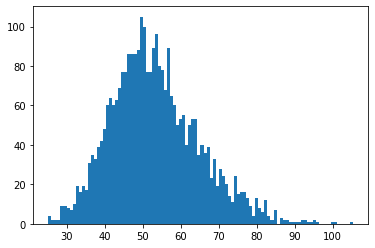

In [116]:
plt.hist(output[:,0], bins=100)
plt.show()

In [117]:
print(len(output[output[:,0]>61.91894035])/iter, len(output[output[:,1]<-0.48509898])/iter) 

0.219 0.20133333333333334


In [10]:
def lnlike(u):
    h0 = u[0]
    om = u[1]
    
    cc = -1/2*((ydata-H(xdata, h0, om))**2/yerr**2).sum()
    
    wm = om*(h0/100)**2
    cmb = -1/2*(wm - 0.1430)**2/0.00000121
    
    return cc

In [14]:
#nll = lambda *args: -lnlike(*args)
#result = op.minimize(nll, [70, 0.3, 7, 6, 0.2], bounds = ((0.001, 100), (0,1), (0.001, 15), (0.001,1), (0.001,1)), options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313e-15, 'gtol': 1e-05, 'eps': 1e-08, 'maxfun': 15000, 'maxiter': 15000, 'iprint': - 1, 'maxls': 20})
#h0, om, b, g, d = result["x"]
#print(h0, om, b, g, d)
#print((h0/100)**2*om)
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [70, 0.3], bounds = ((0, 100), (0,1)), options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313e-15, 'gtol': 1e-05, 'eps': 1e-08, 'maxfun': 15000, 'maxiter': 15000, 'iprint': - 1, 'maxls': 20})
h0, om = result["x"]
print(h0, om, (h0/100)**2*om)

68.14402786803511 0.320211652490243 0.14869375622154063


In [18]:
def lnprior(u):
    h0 = u[0]
    om = u[1]

#    if 0 < h0 < 100 and 0 < om < 1 and 5 < b < 10 and 0.4 < g < 0.8 and 0.1 < delta < 0.3:
    if 0 < h0 < 100 and 0 < om < 1:
        return 0.0
    return -np.inf

In [19]:
def lnprob(u):
    lp = lnprior(u)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(u)

In [20]:
ndim, nwalkers = 2, 30
pos = [[h0, om] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [21]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

In [22]:
sampler.run_mcmc(pos, 10000, progress=True);

/opt/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:258: RuntimeWarning: Initial state is not linearly independent and it will not allow a full exploration of parameter space
  category=RuntimeWarning,
100%|██████████| 10000/10000 [00:13<00:00, 729.99it/s]


In [23]:
tau = sampler.get_autocorr_time()
print(tau)

[33.30958656 33.82562453]


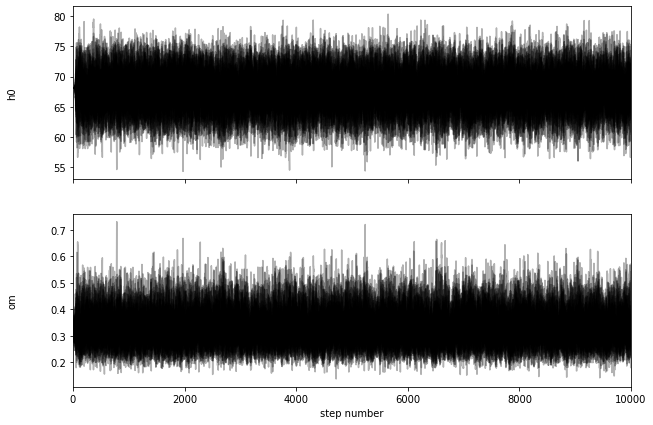

In [24]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["h0", "om"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [25]:
samples = sampler.chain[:, 2000:, :].reshape((-1, ndim))

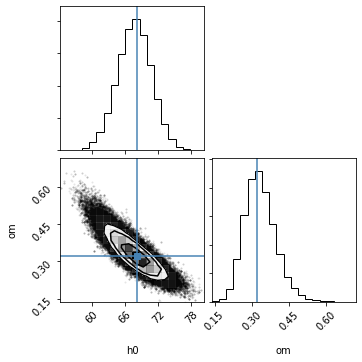

In [26]:
import corner
fig = corner.corner(samples, labels=["h0", "om"], truths=[h0, om])
#fig.savefig("QSO_OHD_CMBprior_zmin07.png")

In [27]:
flat_samples = sampler.get_chain(discard=2000, thin=15, flat=True)
print(flat_samples.shape)

(15990, 2)


In [28]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    #err = 1/2*(q[0]+q[1])
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    #txt = "\mathrm{{{2}}} = {0:.2f}\pm{{{1:.2f}}}"
    #txt = txt.format(mcmc[1], err, labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [29]:
#np.savetxt("CC_mock_input_MCMCchain.txt", flat_samples)

In [22]:
temp = np.loadtxt("QSO_OHD_CMBprior_zmin07_MCMCchain.txt")

In [23]:
np.diff(np.percentile(temp[:,0], [16, 50, 84]))

array([2.63273104, 5.24571448])

In [26]:
(69.206-62.433)/np.sqrt(3.50317066**2+1.328**2)

1.807851130872942